In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [73]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [74]:
print(f'Number of Rows in Data {df.shape[0]}')

Number of Rows in Data 25


In [75]:
print(f'Number of columns {df.shape[1]}')

Number of columns 2


In [76]:
df.shape

(25, 2)

In [77]:
df.isnull().any()

Hours     False
Scores    False
dtype: bool

# Data Visualization

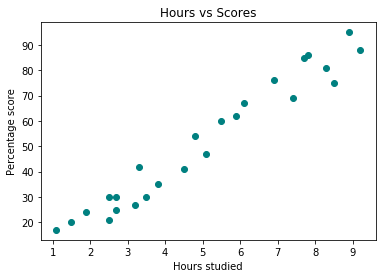

In [78]:
plt.scatter(df.Hours,df.Scores,color='teal')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

          Hours      Scores
Hours    6.3761   62.331500
Scores  62.3315  639.426667


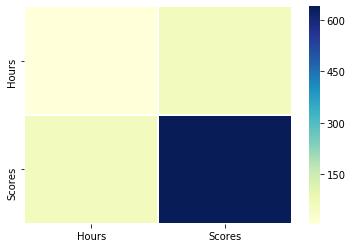

In [79]:
covMatrix = pd.DataFrame.cov(df)
print (covMatrix)
sns.heatmap(covMatrix,cmap='YlGnBu',linewidths=0.30)

In [80]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [81]:
X= X.reshape(-1, 1)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [82]:
Y=y.reshape(-1,1)
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=0)

# Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [85]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y_pred=lr.predict(X_test)

In [87]:
y_pred

array([[15.9477618 ],
       [32.77394723],
       [74.344523  ],
       [25.84551793],
       [59.49788879],
       [38.71260091],
       [19.90686425],
       [78.30362545],
       [69.39564493],
       [11.98865934]])

In [88]:
pd.DataFrame(np.c_[X_test, Y_test, y_pred] , columns= ['Hours' , 'Given Scores', 'Predicted Scores'])

,Hours,Given Scores,Predicted Scores
0,1.5,20.0,15.947762
1,3.2,27.0,32.773947
2,7.4,69.0,74.344523
3,2.5,30.0,25.845518
4,5.9,62.0,59.497889
5,3.8,35.0,38.712601
6,1.9,24.0,19.906864
7,7.8,86.0,78.303625
8,6.9,76.0,69.395645
9,1.1,17.0,11.988659


# Accuracy

In [89]:
accuracy_lr=lr.score(X_test,Y_test)
accuracy_lr

0.956640847232559

In [90]:
print(accuracy_lr*100,'%')

95.66408472325591 %


# Plotting the regression line

In [91]:
line=lr.coef_*X+lr.intercept_

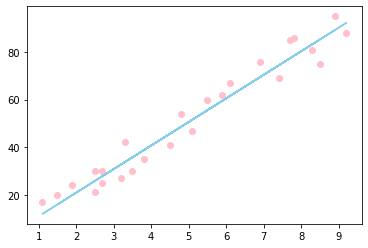

In [92]:
plt.scatter(X,Y,color='pink')
plt.plot(X,line,color='skyblue')
plt.show()

# Predicting score if a student study for 9.25 hrs in a day 

In [93]:
hrs=9.25
hours=[[hrs]]
pred=lr.predict(hours)

In [94]:
pred

array([[92.65537185]])

In [95]:
print("NO of Hours={}".format(hrs))
print("Predicted Score={}".format(pred[0]))

NO of Hours=9.25
Predicted Score=[92.65537185]


# Evaluating the model

In [96]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(Y_test,y_pred))
print('MsE:',metrics.mean_squared_error(Y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

MAE: 4.8945108634106065
MsE: 26.034569687682232
RMSE: 5.102408224327237
